<a href="https://colab.research.google.com/github/hiiya74/Sem-4-Python/blob/main/ch_5_Regression_%E2%80%93Model_Training_and_Evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [115]:
df=pd.read_csv('Book1.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [116]:
#pre processing

In [117]:
# x=df['cgpa']

In [118]:
y=df['package']

In [119]:
# y=df.iloc[:,1-]


In [120]:
x=df.iloc[:,0:1]

In [121]:
x.shape

(200, 1)

In [122]:
y.shape

(200,)

In [123]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
# 20% data save in test and 80% in train  200*(20/100)

In [125]:
x_train.shape

(160, 1)

In [126]:
x_test.shape

(40, 1)

In [127]:
y_train.shape

(160,)

In [128]:
y_test.shape

(40,)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lr=LinearRegression()

In [131]:
model=lr.fit(x_train,y_train)

In [132]:
lr.coef_ #y=mn+b coef is m

array([0.55795197])

In [133]:
lr.intercept_ #y=mn+b intercept is b

np.float64(-0.8961119222429144)

In [134]:
#post processing

In [135]:
y_pred=lr.predict(x_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

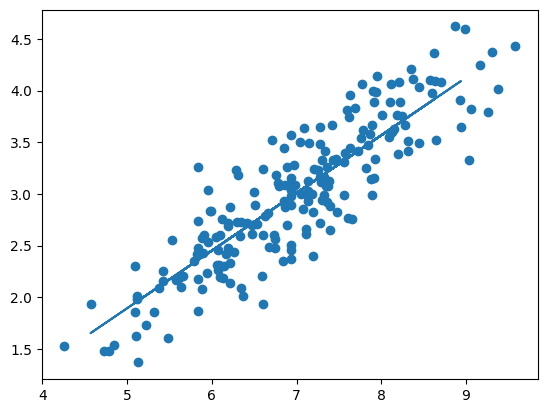

In [136]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test,y_pred)
plt.show()

In [137]:
from sklearn import metrics
import math
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("RMSE",math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2score:",metrics.r2_score(y_test,y_pred)) #imp

MAE 0.2884710931878175
RMSE 0.34827051717731616
R2score: 0.780730147510384


In [138]:
test_data=np.array([9.3,7.8])
test_data
test_data.shape

(2,)

In [113]:
test_data=test_data.reshape(-1,1)
print(test_data)
print(test_data.shape)
print(lr.predict(test_data))

[[9.3]
 [7.8]]
(2, 1)
[4.29284143 3.45591347]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
